In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [4]:
titanic_df=pd.read_csv('Titanic-Dataset.csv')

In [5]:
# Activity 1: Survival Rate by Embarkation Point and Gender
# Calculate and display the survival rate for each combination of embarkation point (Embarked) and gender (Sex).
survival_rate_by_embarkation_point_and_gender=titanic_df.groupby(['Embarked','Sex'])['Survived'].mean()*100
print(survival_rate_by_embarkation_point_and_gender)

Embarked  Sex   
C         female    87.671233
          male      30.526316
Q         female    75.000000
          male       7.317073
S         female    68.965517
          male      17.460317
Name: Survived, dtype: float64


In [15]:
# Activity 2: Average Fare by Passenger Class and Age Group
# Create age groups (e.g., 0-10, 11-20, 21-30, etc.).
# Calculate and display the average fare for each passenger class (Pclass) within each age group.
age_group = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
titanic_df['Age_Group'] = pd.cut(titanic_df['Age'], bins=age_group, right=False)
print(avg_fare_by_class_age)


Pclass  Age_Group
1       [0, 10)      128.319433
        [10, 20)     114.106250
        [20, 30)     101.603797
        [30, 40)      98.344334
        [40, 50)      67.985141
        [50, 60)      74.600770
        [60, 70)      64.262177
        [70, 80)      51.719467
        [80, 90)      30.000000
        [90, 100)           NaN
2       [0, 10)       28.740200
        [10, 20)      20.934489
        [20, 30)      22.273113
        [30, 40)      19.616146
        [40, 50)      23.125000
        [50, 60)      16.025000
        [60, 70)      20.000000
        [70, 80)      10.500000
        [80, 90)            NaN
        [90, 100)           NaN
3       [0, 10)       24.338390
        [10, 20)      13.452276
        [20, 30)      10.273399
        [30, 40)      12.814730
        [40, 50)      13.250124
        [50, 60)       7.700700
        [60, 70)       7.858333
        [70, 80)       7.762500
        [80, 90)            NaN
        [90, 100)           NaN
Name: Fare, dtype: flo

In [18]:
# Activity 3: Survival Rate by Family Size and Passenger Class
# Create a new column called 'FamilySize' representing the total size of each family (SibSp + Parch + 1).
# Analyze the survival rate for each passenger class (Pclass) grouped by family size.
family_size=titanic_df['SibSp']+titanic_df['Parch']+1
titanic_df['FamilySize']=family_size
survival_rate_for_each_pclass_family_size=titanic_df.groupby(['Pclass','FamilySize'])['Survived'].mean()*100
print(survival_rate_for_each_pclass_family_size)

Pclass  FamilySize
1       1              53.211009
        2              72.857143
        3              75.000000
        4              71.428571
        5             100.000000
        6              50.000000
2       1              34.615385
        2              52.941176
        3              67.741935
        4              76.923077
        5             100.000000
        6             100.000000
3       1              21.296296
        2              35.087719
        3              42.553191
        4              66.666667
        5               0.000000
        6               0.000000
        7              33.333333
        8               0.000000
        11              0.000000
Name: Survived, dtype: float64


<ipython-input-21-6a9aae667ba9>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  survival_heatmap=titanic_df.pivot_table(index='Pclass' , columns='Age_Group', values='Survived' , aggfunc='mean')


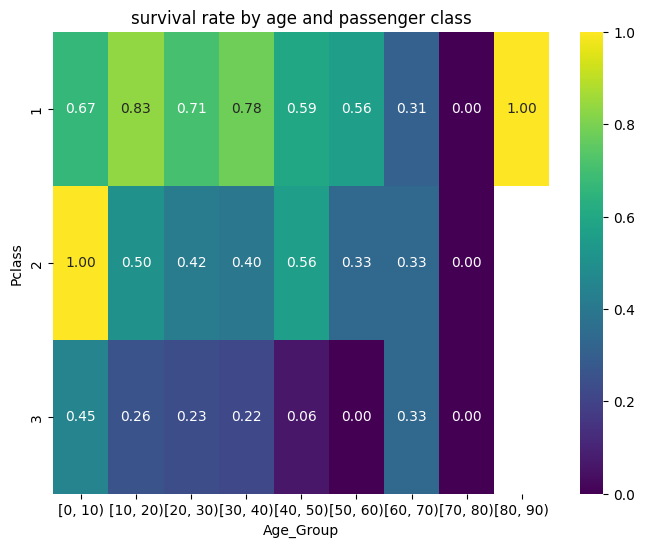

In [21]:
# Activity 4: Visualizing Survival Rate by Age and Passenger Class
# Create a visualization (e.g., a heatmap) showing the survival rate for different age groups (as in Activity 2) and passenger classes.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
survival_heatmap=titanic_df.pivot_table(index='Pclass' , columns='Age_Group', values='Survived' , aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(survival_heatmap, annot=True , cmap='viridis' , fmt='.2f')
plt.title('survival rate by age and passenger class')
plt.xlable='age_group'
plt.ylable='Pclass'
plt.show()

In [22]:
# Activity 5: Advanced Pivot Table Analysis: Survival Rate, Fare, and Age
# Construct a pivot table that simultaneously presents:
#   - The average survival rate
#   - The median fare
#   - The average age
# Grouped by 'Pclass' and 'Sex'.
# Handle potential missing values in the pivot table.

import pandas as pd

# Create the pivot table
advanced_pivot_table = pd.pivot_table(
    titanic_df,
    values=['Survived', 'Fare', 'Age'],  # Values to analyze
    index=['Pclass', 'Sex'],  # Grouping columns
    aggfunc={'Survived': 'mean', 'Fare': 'median', 'Age': 'mean'},  # Aggregation functions
    fill_value=titanic_df.mean(numeric_only=True)  # Fill missing values with column means
)

# Display the pivot table
print(advanced_pivot_table)

                     Age      Fare  Survived
Pclass Sex                                  
1      female  34.611765  82.66455  0.968085
       male    41.281386  41.26250  0.368852
2      female  28.722973  22.00000  0.921053
       male    30.740707  13.00000  0.157407
3      female  21.750000  12.47500  0.500000
       male    26.507589   7.92500  0.135447


In [23]:
file_path = "/content/Titanic-Dataset.csv"
titanic_df = pd.read_csv(file_path)


In [24]:
titanic_df.to_csv("ali_StudentAdmission_data.csv", index=False)